the objective of this notebook is to explore the $k$-NN estimator for calculating divergences between two "bags". Each "bag" represents an independent and identically distributed sample from some unknown probability distribution. 

In [2]:
import numpy as np 

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [4]:
from skl_groups.divergences import KNNDivergenceEstimator
from skl_groups.features import Features

lets try to get the divergence between two same bags...

In [5]:
mvn = np.random.multivariate_normal

In [6]:
sample1 = mvn([0.,0.], np.identity(2), size=100)
sample2 = mvn([0.,0.], np.identity(2), size=101)

(-3.0, 3.0)

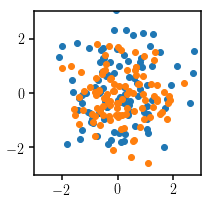

In [7]:
plt.figure(figsize=(3,3))
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])
plt.xlim([-3., 3.])
plt.ylim([-3., 3.])

In [41]:
kNN = KNNDivergenceEstimator(div_funcs=["renyi:.5"], Ks=[1,2,3])#, version='slow')

In [42]:
feat = Features([sample1, sample2])
div_knn = kNN.fit_transform(feat)
print div_knn

[[[[-0.          0.18756965]
   [ 0.         -0.        ]]

  [[-0.          0.        ]
   [ 0.         -0.        ]]

  [[-0.          0.        ]
   [ 0.         -0.        ]]]]


Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs
Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs


lets try to use it to measure non-Gaussianity

In [62]:
gauss = mvn([0.], np.identity(1), size=1000)
nongauss = np.random.uniform(-3., 3., size=1200).reshape((1200,1))

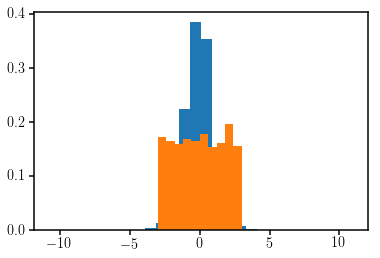

In [64]:
fig = plt.figure()
sub = fig.add_subplot(111)
_ = sub.hist(gauss, normed=True)
_ = sub.hist(nongauss, normed=True)

In [65]:
kNN = KNNDivergenceEstimator(div_funcs=["renyi:.5"], Ks=[1,2,3,4,5], version='slow')
feat = Features([gauss, nongauss])
div_knn_nongauss = kNN.fit_transform(feat)
print div_knn_nongauss

[[[[-0.          0.86909521]
   [ 0.94009614 -0.        ]]

  [[-0.          0.32736978]
   [ 0.35968187 -0.        ]]

  [[-0.          0.29730695]
   [ 0.27369896 -0.        ]]

  [[-0.          0.282682  ]
   [ 0.2460521  -0.        ]]

  [[-0.          0.2662349 ]
   [ 0.25276583 -0.        ]]]]


In [49]:
div_1NN_sym = []
div_2NN_sym = []
div_3NN_sym = []
for i in range(1000): 
    gauss2 = (mvn([0.], np.identity(1), size=120))
    kNN = KNNDivergenceEstimator(div_funcs=["renyi:.8"], Ks=[1,2,3], version='slow')
    feat = Features([gauss, gauss2])
    div_knn = kNN.fit_transform(feat)
    div_1NN_sym.append(0.5*(div_knn[0][0][0][1] + div_knn[0][0][1][0]))
    div_2NN_sym.append(0.5*(div_knn[0][1][0][1] + div_knn[0][1][1][0]))
    div_3NN_sym.append(0.5*(div_knn[0][2][0][1] + div_knn[0][2][1][0]))

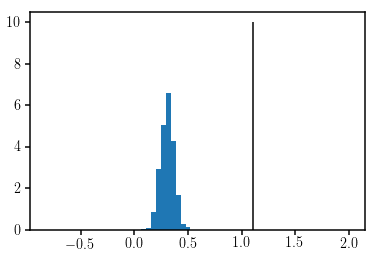

In [38]:
plt.hist(np.array(div_1NN_sym), normed=True)
plt.vlines(0.5*(div_knn_nongauss[0][0][0][1]+div_knn_nongauss[0][0][1][0]), 0, 10)

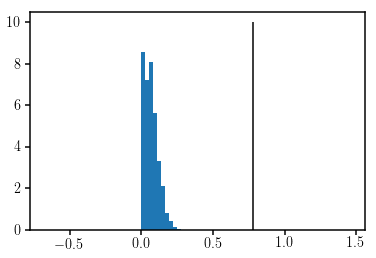

In [39]:
plt.hist(np.array(div_2NN_sym), normed=True)
plt.vlines(0.5*(div_knn_nongauss[0][1][0][1]+div_knn_nongauss[0][1][1][0]), 0, 10)

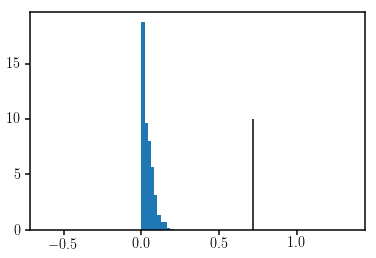

In [40]:
plt.hist(np.array(div_3NN_sym), normed=True)
plt.vlines(0.5*(div_knn_nongauss[0][2][0][1]+div_knn_nongauss[0][2][1][0]), 0, 10)